In [21]:
%load_ext autoreload
%autoreload 2

import os
from crispr.class_sc import Omics
import pandas as pd

ddd = "/home/asline01/projects/data/ileal-cd/CD-1"  # cellranger directory

file_path = os.path.join(ddd, "filtered_feature_bc_matrix")
col_sample_id = "orig.ident"
kws_harmony = {"plot_convergence": True,
               "random_state": 1618}
kws_init = {"assay": None, "assay_protein": None, 
            "col_gene_symbols": "gene_symbols", 
            "col_cell_type": "majority_voting", 
            "col_sample_id": None,
            "col_condition": None, 
            "key_control": None, 
            "key_treatment": None}
kws_pp = {"kws_hvg": {"min_mean": 0.0125, "max_mean": 10, 
                      "min_disp": 0.5, "flavor": "cell_ranger"}, 
          "target_sum": 10000.0, "cell_filter_pmt": [0, 15], 
          "cell_filter_ngene": [200, None], "cell_filter_ncounts": [3, 40000], 
          "gene_filter_ncell": [3, None], "regress_out": None, 
          "kws_scale": "log"}
kws_cluster = {"method_cluster": "leiden", "kws_umap": {"min_dist": 0.3}, 
               "kws_neighbors": None,  "resolution": 1,
               "kws_pca": {"n_comps": None, "use_highly_variable": True}, 
               "resolution": 0.5, "kws_cluster": {}}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
%load_ext autoreload
%autoreload 2

import os
from crispr.class_sc import Omics
import pandas as pd

ddd = [f"/home/asline01/projects/data/ileal-cd/{x}" 
       for x in ["192", "193", "195", "196"]]
file_paths = [os.path.join(d, "filtered_feature_bc_matrix") for d in ddd]
selves = [Omics(f) for f in file_paths]



<<< INITIALIZING CRISPR CLASS OBJECT >>>




col_gene_symbols='gene_symbols'
col_cell_type='leiden'
col_sample_id='standard_sample_id'
col_batch='standard_sample_id'
col_condition=np.nan
key_control=np.nan
key_treatment=np.nan

<<< LOADING 10X FILE /home/asline01/projects/data/ileal-cd/192/filtered_feature_bc_matrix >>>


Cell Counts: Raw

6024


Gene Counts: Raw



 AnnData object with n_obs × n_vars = 6024 × 36601
    var: 'gene_ids', 'feature_types'
    layers: 'counts'


 AnnData object with n_obs × n_vars = 6024 × 36601
    var: 'gene_ids', 'feature_types'
    layers: 'counts'


<<< INITIALIZING CRISPR CLASS OBJECT >>>




col_gene_symbols='gene_symbols'
col_cell_type='leiden'
col_sample_id='standard_sample_id'
col_batch='standard_sample_id'
col_condition=np.nan
key_control=np.nan
key_treatment=np.nan

<<< LOADING 10X FILE /home/asline01/projects/data/ileal-cd/193/filtered_feature_bc_matrix >>>


Cell Counts: Raw

8146


Gene Counts: Raw



 AnnData object with n_obs × n_vars = 

# Single-Cell Omics Object Initialization

In [22]:
self = Omics(file_path, **kws_init)



<<< INITIALIZING CRISPR CLASS OBJECT >>>


<<< LOADING 10X FILE /home/asline01/projects/data/ileal-cd/CD-1/filtered_feature_bc_matrix >>>


Cell Counts: Raw

4932


Gene Counts: Raw



 AnnData object with n_obs × n_vars = 4932 × 36601
    var: 'gene_ids', 'feature_types'
    layers: 'counts'



col_gene_symbols='gene_symbols'
col_cell_type='majority_voting'
col_sample_id=np.nan
col_batch=np.nan
col_condition=np.nan
key_control=np.nan
key_treatment=np.nan


 AnnData object with n_obs × n_vars = 4932 × 36601
    var: 'gene_ids', 'feature_types'
    layers: 'counts'


# Preprocessing

Perform normalization, filtering, QC, etc.

AnnData object with n_obs × n_vars = 4932 × 36601
    obs: 'n_counts', 'log_counts', 'n_genes'
    var: 'gene_ids', 'feature_types'
    layers: 'counts'

Un-Used Keyword Arguments: {'assay_protein': None, 'col_sample_id': None, 'col_batch': None, 'col_condition': None, 'kws_umap': {'min_dist': 0.3}}




Cell Counts: Initial

4932


Gene Counts: Initial

None 

 10 

                gene_ids    feature_types
count             36601            36601
unique            36601                1
top     ENSG00000243485  Gene Expression
freq                  1            36601 



<<< PERFORMING QUALITY CONTROL ANALYSIS>>>


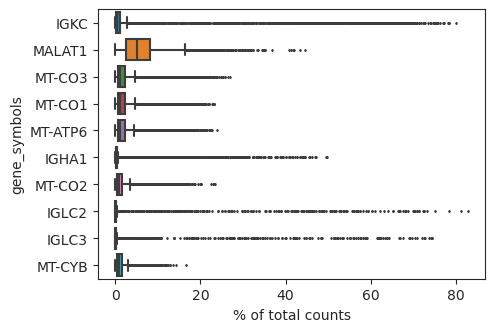


	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...


... storing 'feature_types' as categorical



	*** Calculating & plotting QC metrics...




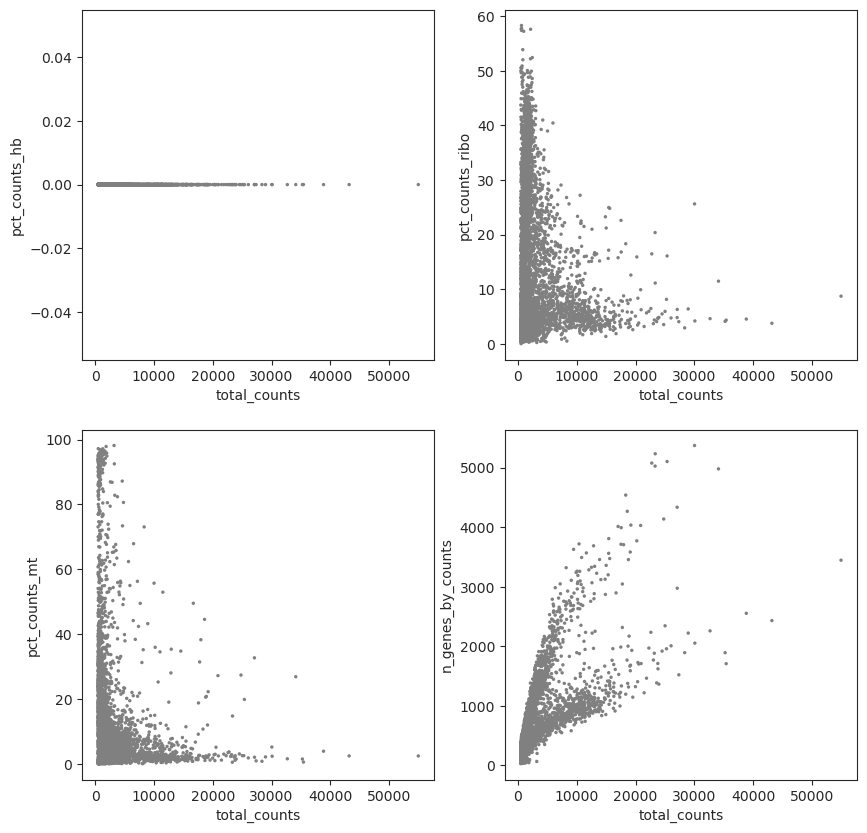

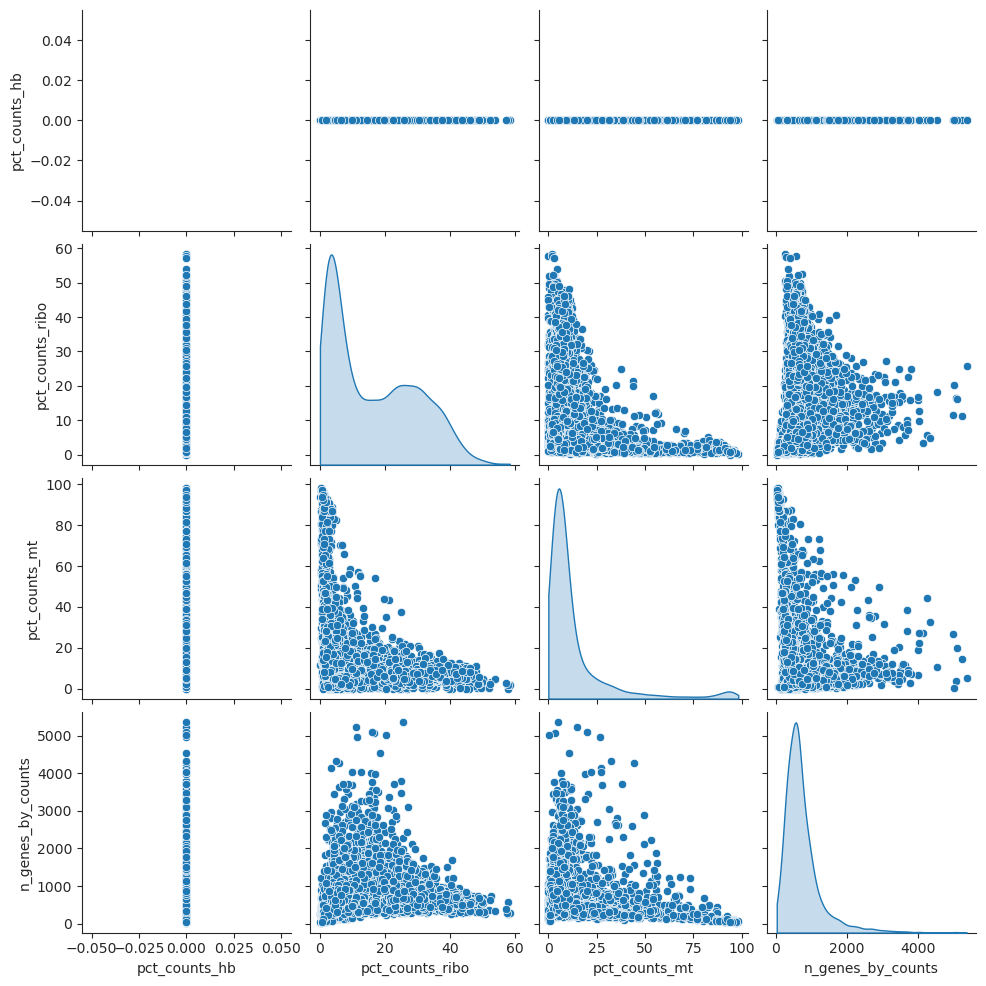

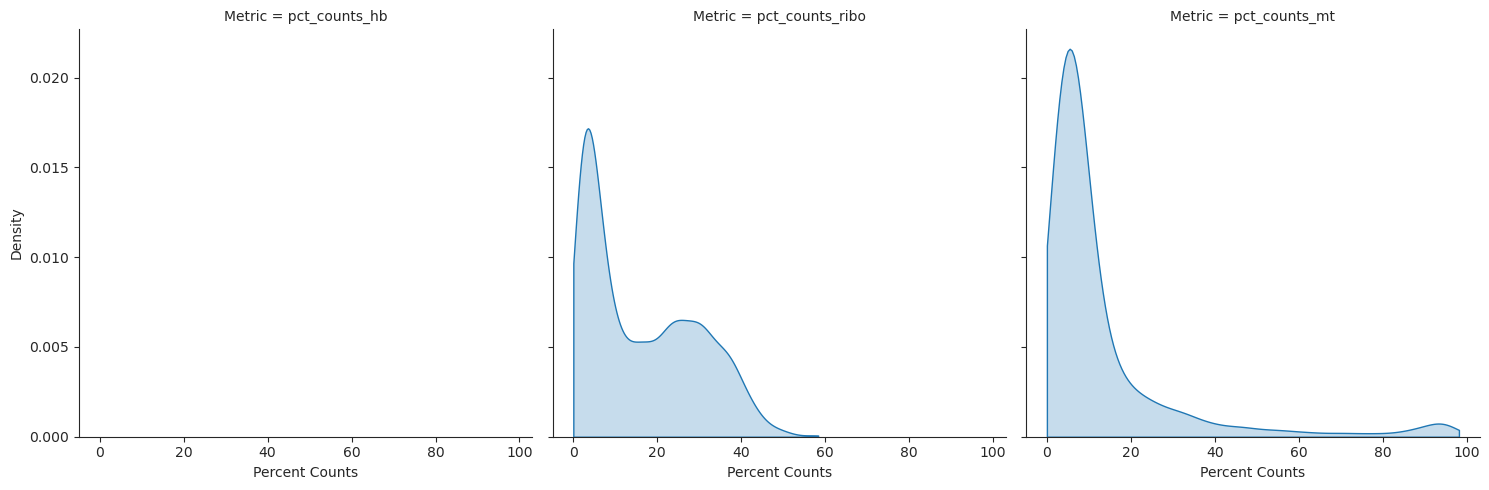

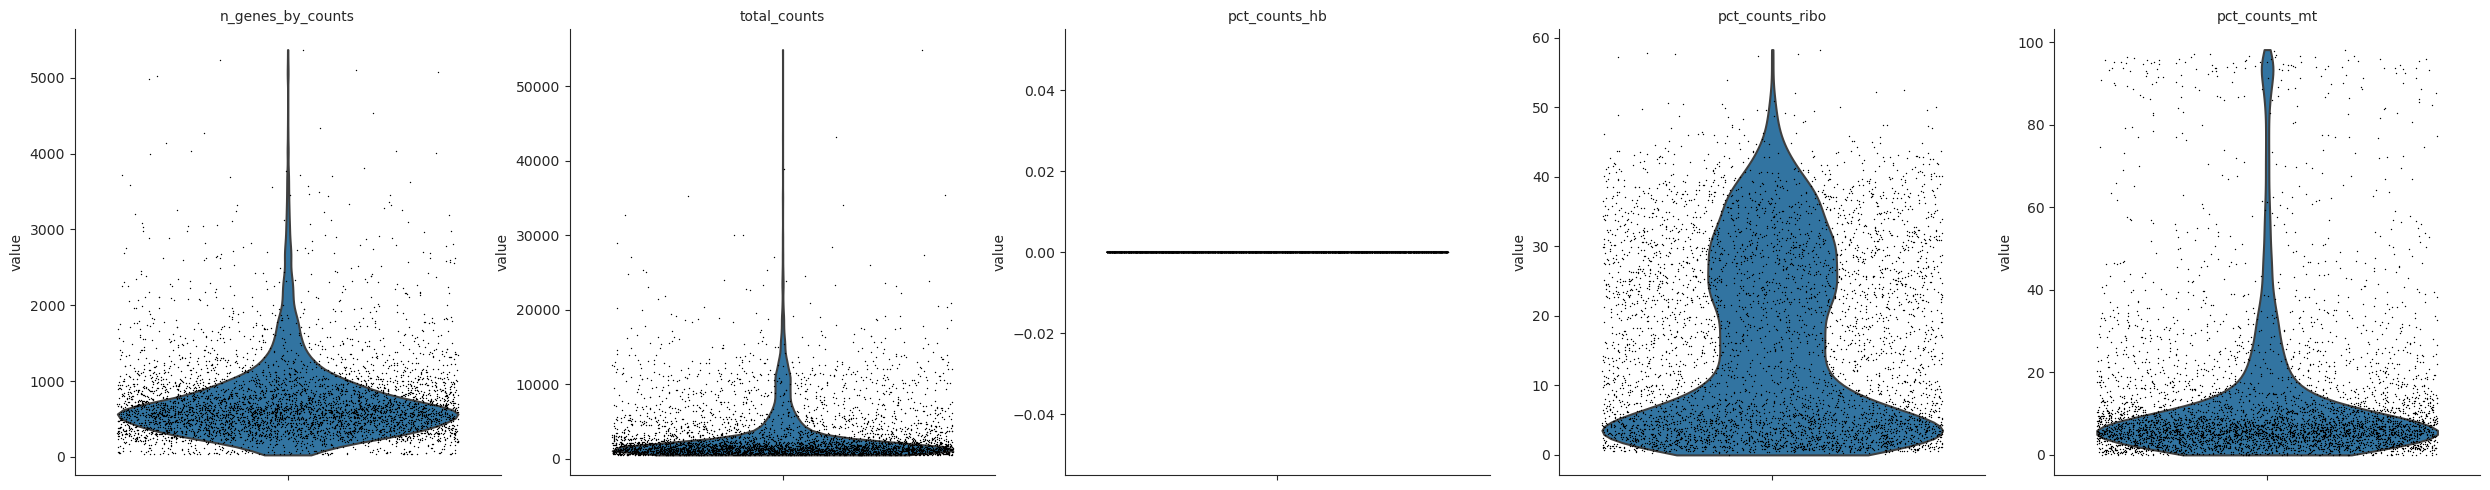

       n_cells_by_counts   mean_counts  log1p_mean_counts  \
count       36601.000000  36601.000000       36601.000000   
mean           99.487746      0.081977           0.030454   
std           317.243598      3.301122           0.149551   
min             0.000000      0.000000           0.000000   
25%             0.000000      0.000000           0.000000   
50%             2.000000      0.000406           0.000405   
75%            66.000000      0.015410           0.015292   
max          4885.000000    574.180847           6.354684   

       pct_dropout_by_counts  total_counts  log1p_total_counts  
count           36601.000000  3.660100e+04        36601.000000  
mean               97.982811  4.043123e+02            2.221017  
std                 6.432352  1.628113e+04            2.417464  
min                 0.952960  0.000000e+00            0.000000  
25%                98.661800  0.000000e+00            0.000000  
50%                99.959448  2.000000e+00            1.0986

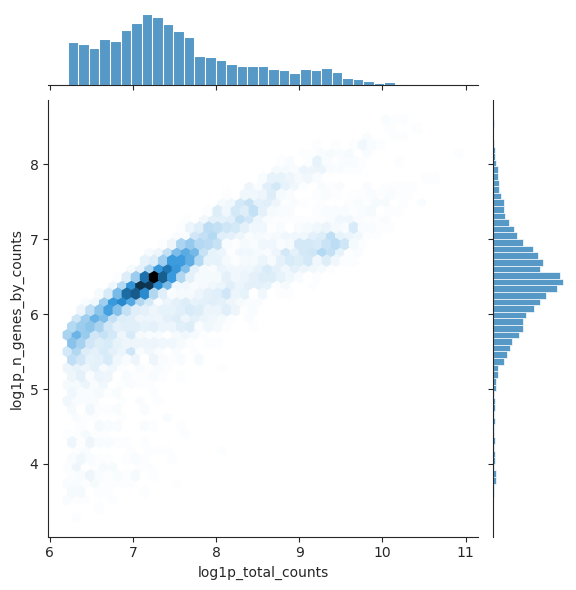

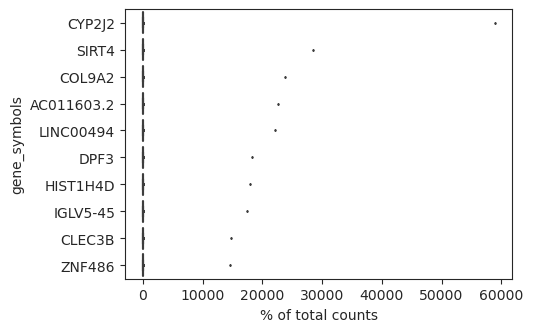


	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...




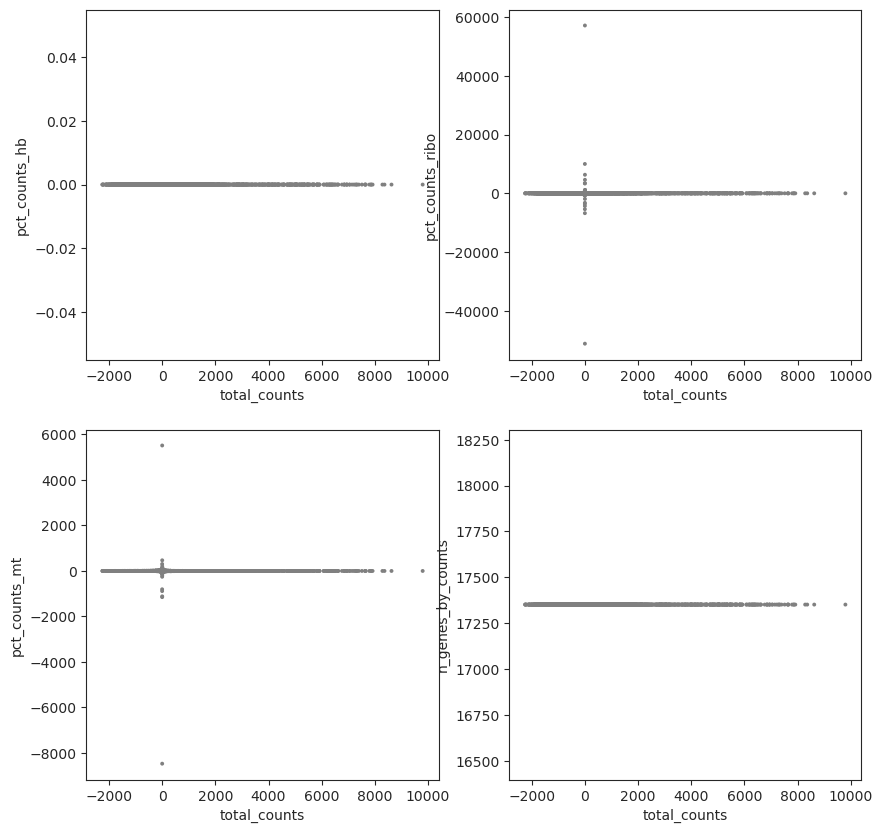

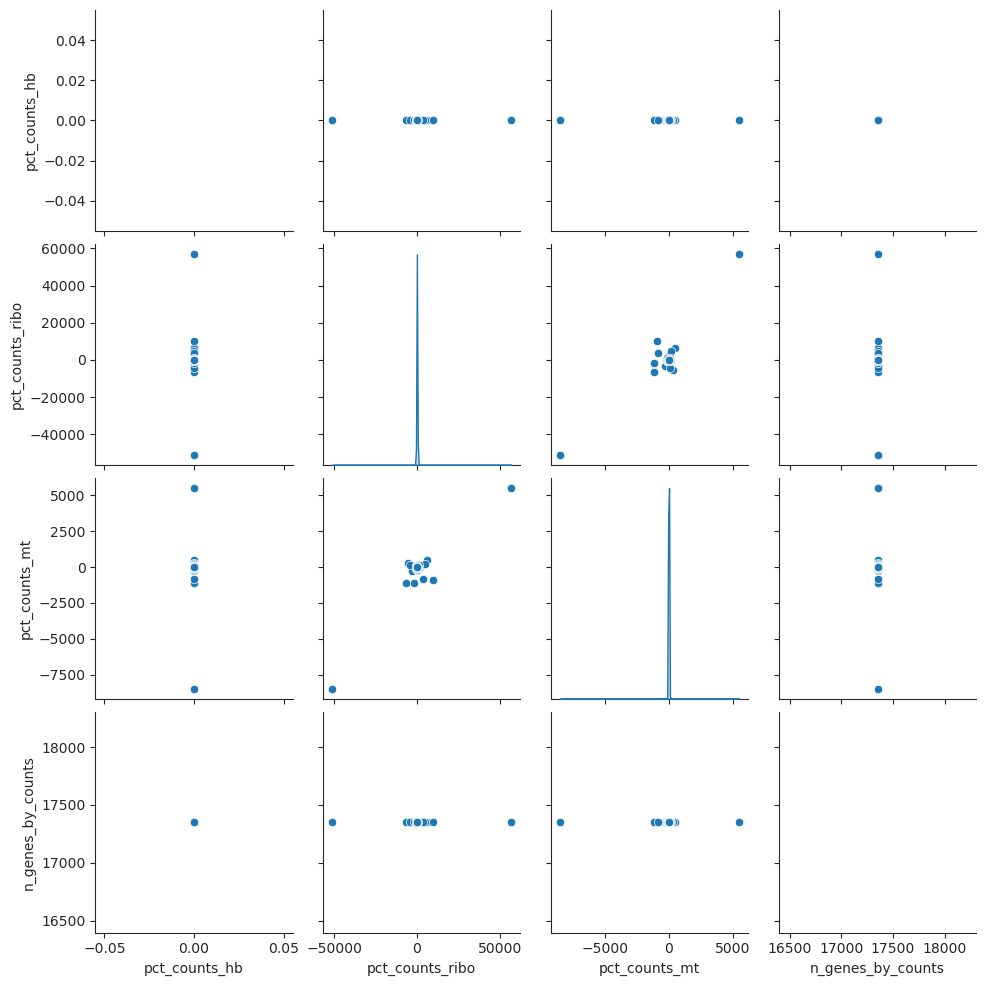

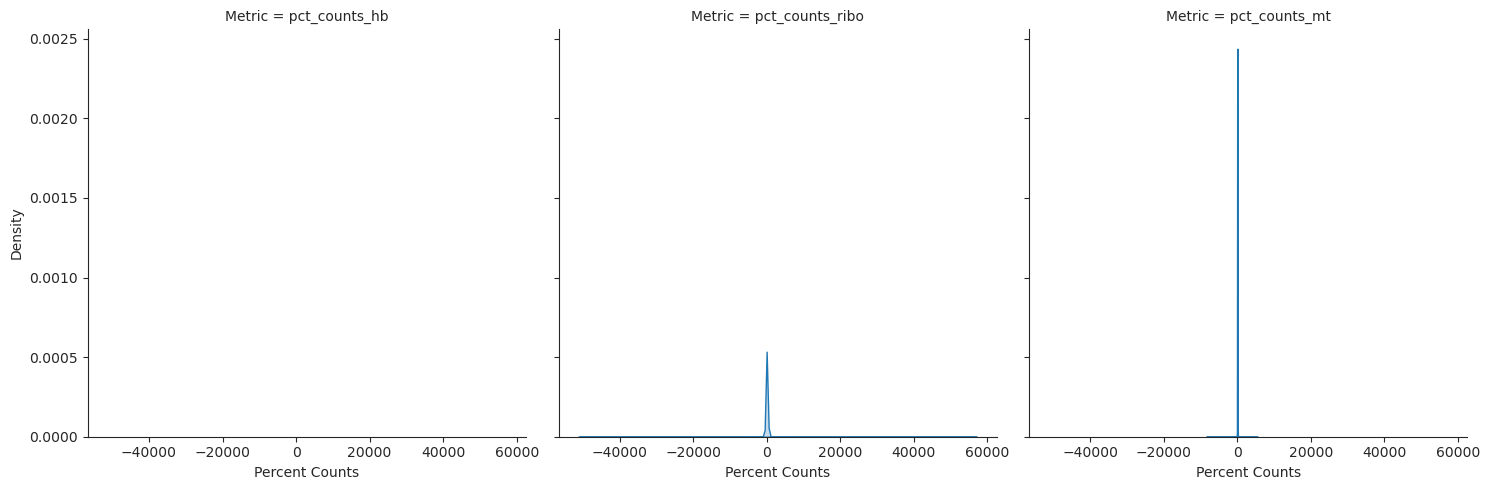

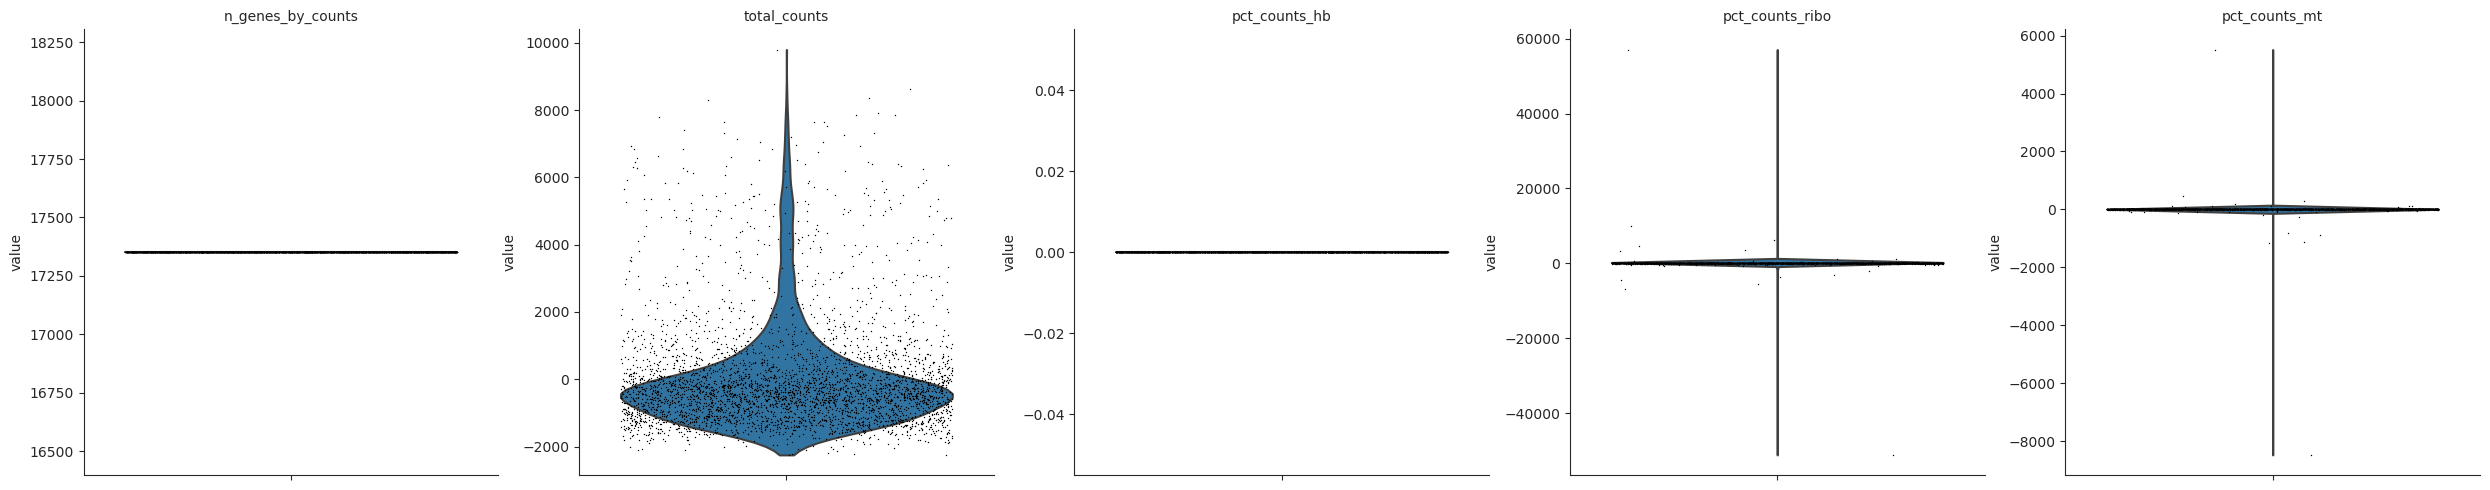

       n_cells_by_counts   mean_counts  log1p_mean_counts  \
count            17351.0  1.735100e+04       1.735100e+04   
mean              3834.0  4.219431e-10       4.219035e-10   
std                  0.0  2.801806e-07       2.801806e-07   
min               3834.0 -2.084351e-06      -2.084354e-06   
25%               3834.0 -1.650263e-07      -1.650263e-07   
50%               3834.0  6.373997e-10       6.373997e-10   
75%               3834.0  1.651060e-07       1.651059e-07   
max               3834.0  1.506315e-06       1.506314e-06   

       pct_dropout_by_counts  total_counts  log1p_total_counts       n_cells  \
count                17351.0  17351.000000        17351.000000  17351.000000   
mean                     0.0      0.000002            0.000001    177.950320   
std                      0.0      0.001074            0.001074    379.319359   
min                      0.0     -0.007991           -0.008024      3.000000   
25%                      0.0     -0.000633        

(AnnData object with n_obs × n_vars = 3834 × 17351
     obs: 'n_counts', 'log_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
     var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
     uns: 'log1p', 'hvg'
     layers: 'counts', 'log1p', 'scaled',
 {'qc_metrics': {'highly_expressed_genes': None,
   'qc_n_genes_by_counts_scatter': <Figure size 1000x1000 with 4 Axes>,
   'pairplot': <seaborn.axisgrid.PairGrid at 0x7f6f70ac6470>,
   'pct_counts_kde': <seaborn.axisgrid.FacetGrid at 0x7f6f46d2a140>,
   'metrics_violin': None,
   'qc_log': <s

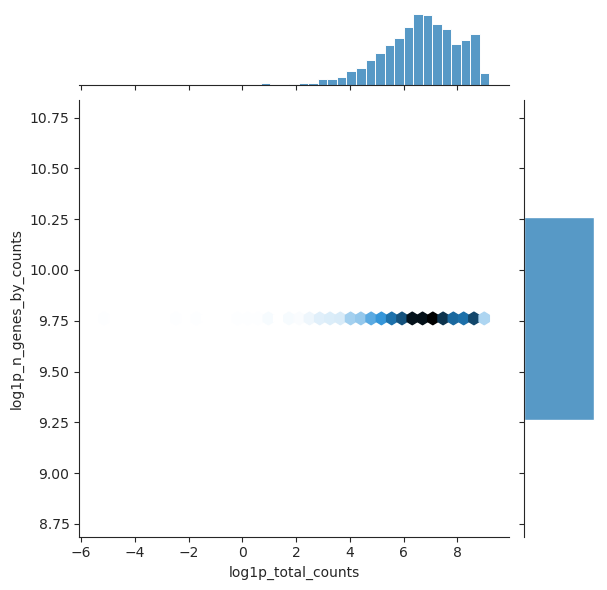

In [23]:
self.preprocess(**kws_pp)

# Clustering

Use this method to perform dimensionality reduction and clustering.

Optionally, by specifying `model_celltypist`, we can also detect cell types using `CellTypist`.

You can provide a CellTypist model name as a string, or to train your own custom model, provide an AnnData object with the training data and, if cell type column names differ across training and main data (in `self`) or if you want to pass additional arguments to `celltypist.train()`, then provide a dictionary of arguments to `kws_train`. (Cell type name can be under `labels` or `col_cell_type` in this dictonary.)

You can see what models are available with this code:
```
import celltypist
celltypist.models.models_description().set_index("model").description.apply(lambda x: print(x))
```

Or it will show you valid models automatically if you feed it an unknown model: `self.cluster(**kws_cluster, model="kate_moss.pkl")``

You can perform this after clustering by leaving `model_celltypist` as None and at any point running `self.annotate_clusters(...)`.

Un-used Keyword Arguments: {'assay': None, 'col_gene_symbols': 'gene_symbols', 'col_cell_type': 'majority_voting', 'col_sample_id': None, 'col_batch': None, 'col_condition': None, 'key_control': None, 'key_treatment': None}


<<< PERFORMING PCA >>>

 {'n_comps': None, 'use_highly_variable': True}


<<< COMPUTING NEIGHBORHOOD GRAPH >>>



<<< EMBEDDING: UMAP >>>

UMAP Keywords:

 {'min_dist': 0.3}


<<< CLUSTERING WITH LEIDEN METHOD >>>


<<< CREATING UMAP PLOTS >>>


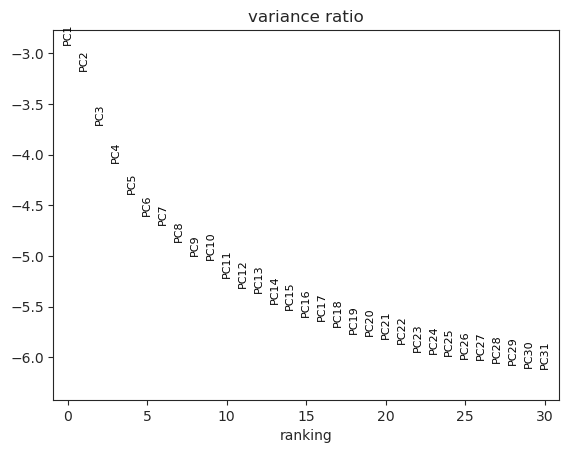

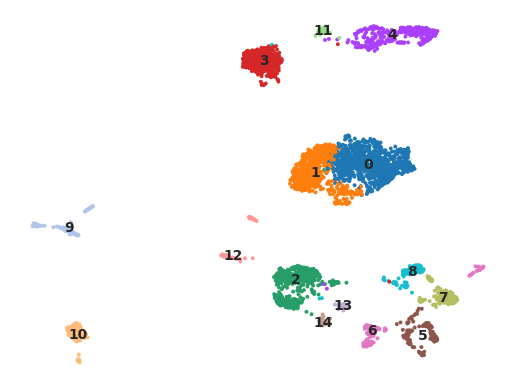

🔬 Input data has 3834 cells and 17351 genes
🔗 Matching reference genes in the model
🧬 4062 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


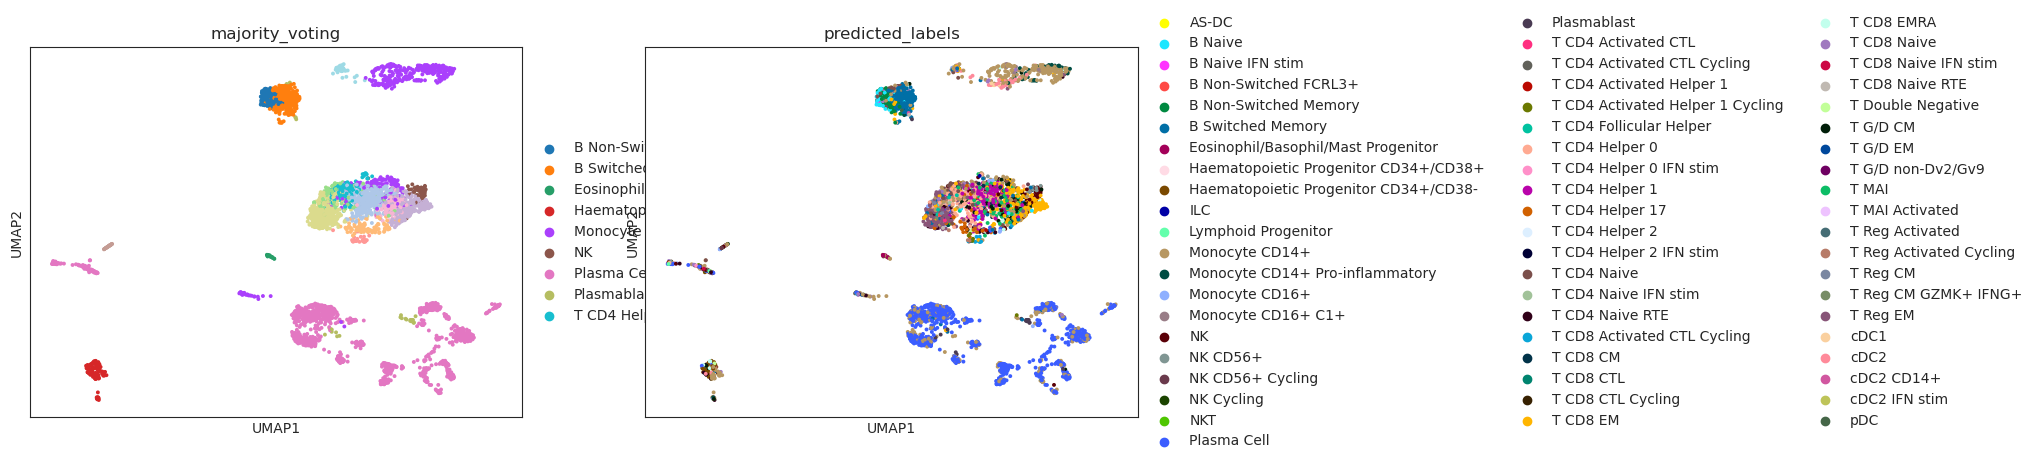

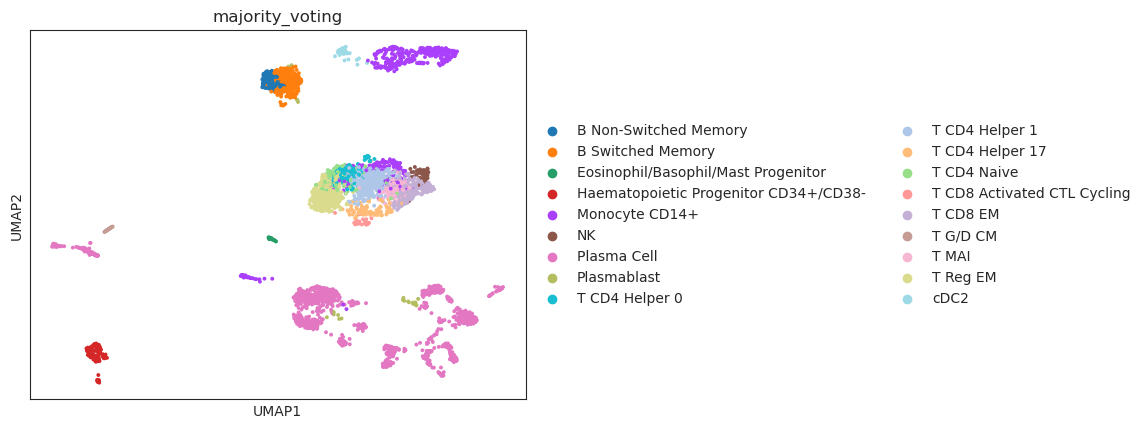

In [24]:
self.cluster(**kws_cluster)
_ = self.annotate_clusters("COVID19_HumanChallenge_Blood.pkl")

# Plots

Create a variety of plots visualizing gene expression, cell clusters, etc.

If you want to focus on a cell type categorization column other than 

You can often specify splitting/color-coding columns to be different across different plots by specifying a different `col_cell_type` argument in their respective `kws_<PLOT>` arguments (e.g., `kws_umap="predicted_labels"`).

By specifying `color` in `kws_umap`, you can create an additional UMAP colored by a column other than the cell type. If you also specified `cell_types_circle` in the main list of arguments, the UMAP will be colored by `kws_umap["color"]` (or the cell type column, if color isn't specified), and the cell types listed in `cell_types_circle` will be circled on it. 

In [1]:
clus = list(self.rna.obs["predicted_labels"].sample(2))  # clusters to circle
kgh = list(pd.Series(self.rna.var_names).sample(2))  # gene labels: highlight 
figs = self.plot(genes=16,  # or could specify list of gene names
                 col_cell_type="majority_voting",
                 cell_types_circle=clus,  # list cell types to circle on UMAP
                 kws_gex_violin=dict(scale="area", height=10),
                 genes_highlight=kgh,  # could be genes names to highlight
                 kws_umap=dict(col_cell_type="predicted_labels",
                               color=None))  # for UMAP

NameError: name 'self' is not defined